In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv('./Resources/chicago_marathon_2018.csv')
df.head()

In [ ]:
df['country'] = df['name'].str.extract('\((.{3})\)')
df = df.dropna()
df.head()

In [ ]:
df['country'] = df['country'].apply(lambda x: x if x in ('USA', 'MEX', 'GBR', 'CHN', 'CAN') else 'Other')

In [ ]:
df[['half','finish']] = df[['half','finish']].apply(pd.to_timedelta).apply(lambda x: x.dt.total_seconds())

In [6]:
X = df[['half','finish', 'division', 'country']].copy()
X['division'] = LabelEncoder().fit_transform(X['division'])
X['country'] = LabelEncoder().fit_transform(X['country'])
X = X.dropna()
X.head()

,half,finish,division,country
0,3786.0,7511.0,4,2
1,3784.0,7524.0,2,4
2,3784.0,7550.0,2,4
3,3784.0,7557.0,3,4
4,3784.0,7581.0,3,5


In [7]:
# Scale the dataset using MinMaxScaler()
X_scaled = MinMaxScaler().fit_transform(X)
X_scaled

array([[2.19170076e-04, 0.00000000e+00, 3.07692308e-01, 4.00000000e-01],
       [7.30566920e-05, 5.18237991e-04, 1.53846154e-01, 8.00000000e-01],
       [7.30566920e-05, 1.55471397e-03, 1.53846154e-01, 8.00000000e-01],
       ...,
       [6.76870251e-01, 9.45026909e-01, 7.69230769e-01, 1.00000000e+00],
       [6.60432496e-01, 9.49212677e-01, 6.92307692e-01, 1.00000000e+00],
       [6.79208065e-01, 1.00000000e+00, 5.38461538e-01, 1.00000000e+00]])

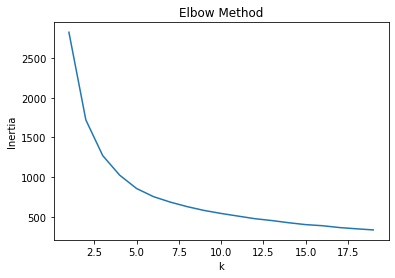

In [8]:
intertias = {}
K = range(1,20)
for k in K:
    kmeanmodel = KMeans(n_clusters=k).fit(X_scaled)
    intertias[k] = kmeanmodel.inertia_
    
# Plot
plt.plot(list(intertias.keys()), list(intertias.values()))
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [16]:
# Create a KMeans model with 3 clusters
model = KMeans(n_clusters=4, random_state=42).fit(X_scaled)

In [17]:
# Calculate predicted values.
y_pred = model.predict(X_scaled)

In [18]:
# Add prediected values onto the original dataframe
df_y = pd.DataFrame(y_pred, columns=['Cluster'])
df_y.head()
#df.head()
#combined = df.join(df_y, how='inner')
#combined.head()

,Cluster
0,2
1,3
2,3
3,3
4,3


In [19]:
combined = df.join(df_y, how='inner')
combined.head()

,place_overall,place_gender,bib,name,division,half,finish,country,Cluster
0,1,1,1,"Farah, Mo (GBR)",35-39,3786.0,7511.0,GBR,2
1,2,2,2,"Bayih, Mosinet Geremew (ETH)",25-29,3784.0,7524.0,Other,3
2,3,3,3,"Osako, Suguru (JPN)",25-29,3784.0,7550.0,Other,3
3,4,4,4,"Kipkemoi, Kenneth (KEN)",30-34,3784.0,7557.0,Other,3
4,5,5,5,"Rupp, Galen (USA)",30-34,3784.0,7581.0,USA,3


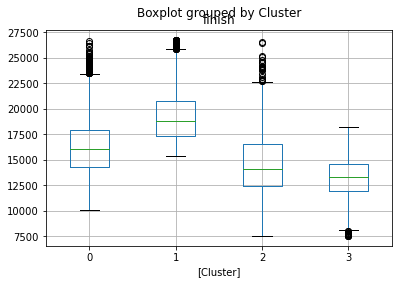

In [20]:
# Create a boxplot
combined.boxplot(['finish'], by=['Cluster'])

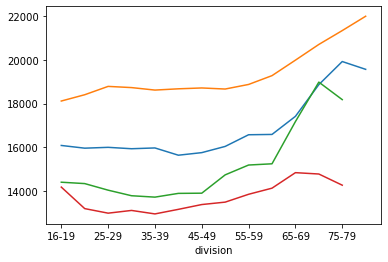

In [21]:
# Plot median finish times by division for each cluster
combined[combined['Cluster'] == 0].groupby('division').median()['finish'].plot()
combined[combined['Cluster'] == 1].groupby('division').median()['finish'].plot()
combined[combined['Cluster'] == 2].groupby('division').median()['finish'].plot()
combined[combined['Cluster'] == 3].groupby('division').median()['finish'].plot()